Modelo de Clasificacion con Keras. Implementacion del modelo de redes neuronales 
clase2

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
files.upload()

Saving clase_2_test_data.csv to clase_2_test_data.csv
Saving clase_2_train_data.csv to clase_2_train_data.csv


{'clase_2_test_data.csv': b'# x1,x2,y\n2.114211367955163845e-01,-9.718004447160974446e-02,1.000000000000000000e+00\n-2.669594261643954414e-01,8.708373145514692881e-01,0.000000000000000000e+00\n9.722202158658468374e-01,3.095854422979483211e-01,0.000000000000000000e+00\n9.746815718510188908e-01,6.496508841969761416e-01,0.000000000000000000e+00\n5.852242551094093415e-01,8.307777465454454502e-01,0.000000000000000000e+00\n1.839952721815344416e-01,-1.674748891424873709e-01,1.000000000000000000e+00\n-3.546756840579738390e-01,9.063159314854463133e-01,0.000000000000000000e+00\n-7.074801319519702369e-02,1.140715815924498999e+00,0.000000000000000000e+00\n7.130131942078665741e-01,2.485505645101535599e-01,0.000000000000000000e+00\n1.559994881757007734e+00,-4.924486539923920159e-01,1.000000000000000000e+00\n1.833466661656711016e+00,4.494363079468933209e-01,1.000000000000000000e+00\n1.844126976119952799e+00,-1.040718053783150632e-01,1.000000000000000000e+00\n4.533093841637007571e-01,1.151939473258385

In [3]:
data_train = pd.read_csv('clase_2_train_data.csv')
print(data_train.head())

       # x1        x2    y
0 -0.128629  0.836679  0.0
1  1.380974 -0.486545  1.0
2  1.282733  0.161911  1.0
3  0.787163 -0.396736  1.0
4  2.024601 -0.521024  1.0


In [4]:
data_test = pd.read_csv('clase_2_test_data.csv')
print(data_test.head())

       # x1        x2    y
0  0.211421 -0.097180  1.0
1 -0.266959  0.870837  0.0
2  0.972220  0.309585  0.0
3  0.974682  0.649651  0.0
4  0.585224  0.830778  0.0


In [5]:
X1 = data_train.iloc[:,0]
X2 =  data_train.iloc[:,1]
X_train = np.array([X1,X2])
Y_train = np.array([data_train.iloc[:,2]])

In [6]:
X_train = X_train.T
Y_train = Y_train.T
print(X_train.shape)
print(Y_train.shape)

(900, 2)
(900, 1)


In [7]:
X1_test = data_test.iloc[:,0]
X2_test =  data_test.iloc[:,1]
X_test = np.array([X1_test,X2_test])
Y_test = np.array([data_test.iloc[:,2]])
X_test = X_test.T
Y_test = Y_test.T
print(X_test.shape)
print(Y_test.shape)

(100, 2)
(100, 1)


In [30]:
# Normalizacion de Datos
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

In [8]:
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense

In [9]:
n,m = X_train.shape

In [43]:
model = Sequential()
# layer 1 /  entrada 3 Neuronas y m entradas (2)
model.add(Dense(3,input_dim = m))
# layer 2
model.add(Dense(2,activation='sigmoid'))
# layer 3
model.add(Dense(1,activation='sigmoid'))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


Creamos el modelo SGD con funcion de costo MSE 

In [44]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mse'])

Entrenamiento del modelo y evaluacion de metrica


In [45]:
history = model.fit(X_train , Y_train , validation_data=(X_test , Y_test) , epochs = 100 , batch_size = 20 )

Epoch 1/100
45/45 [==============================] - 0s 3ms/step - loss: 0.2557 - mse: 0.2557 - val_loss: 0.2662 - val_mse: 0.2662
Epoch 2/100
45/45 [==============================] - 0s 1ms/step - loss: 0.2525 - mse: 0.2525 - val_loss: 0.2619 - val_mse: 0.2619
Epoch 3/100
45/45 [==============================] - 0s 1ms/step - loss: 0.2497 - mse: 0.2497 - val_loss: 0.2580 - val_mse: 0.2580
Epoch 4/100
45/45 [==============================] - 0s 1ms/step - loss: 0.2472 - mse: 0.2472 - val_loss: 0.2546 - val_mse: 0.2546
Epoch 5/100
45/45 [==============================] - 0s 1ms/step - loss: 0.2450 - mse: 0.2450 - val_loss: 0.2515 - val_mse: 0.2515
Epoch 6/100
45/45 [==============================] - 0s 1ms/step - loss: 0.2430 - mse: 0.2430 - val_loss: 0.2488 - val_mse: 0.2488
Epoch 7/100
45/45 [==============================] - 0s 1ms/step - loss: 0.2413 - mse: 0.2413 - val_loss: 0.2463 - val_mse: 0.2463
Epoch 8/100
45/45 [==============================] - 0s 1ms/step - loss: 0.2396 - m

Graficos

In [46]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig1 = go.Figure()
fig1.add_trace(go.Scattergl(y=history.history['mse'], name='Train'))
fig1.add_trace(go.Scattergl(y=history.history['val_mse'], name='Test'))
fig1.update_layout(height=500, width=700,xaxis_title='Epoch', yaxis_title='mse')

fig1.show()

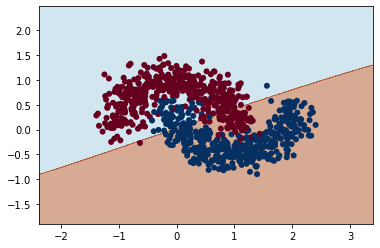

In [47]:
Xmin1, Xmax1 = X_train[:,0].min()-1, X_train[:,0].max()+1
Xmin2, Xmax2 = X_train[:,1].min()-1, X_train[:,1].max()+1
x1_span = np.linspace(Xmin1,Xmax1,1000)
x2_span = np.linspace(Xmin2,Xmax2,1000)
xx, yy = np.meshgrid(x1_span,x2_span)

labels = model.predict_classes(np.c_[xx.ravel(),yy.ravel()])
z = labels.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx,yy,z,cmap='Paired',alpha=0.5)

ax.scatter(X_train[:,0],X_train[:,1],c=Y_train, cmap='RdBu',lw=0)

Cambiando el optimizador de SGD a ADAM,  la funcion de costo de MSE a Binary Crossentropy y la funcion de activacion de Sigmoid a Relu

In [87]:
model_2 = Sequential()
model_2.add(Dense(3,input_dim=m))
model_2.add(Dense(2,activation='relu'))
model_2.add(Dense(1,activation='relu'))

model_2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['mse'])

In [88]:
history_2 = model_2.fit(X_train , Y_train , validation_data = ( X_test , Y_test), epochs=100,batch_size=20)

Epoch 1/100
45/45 [==============================] - 0s 4ms/step - loss: 4.6949 - mse: 0.7162 - val_loss: 3.8838 - val_mse: 0.6837
Epoch 2/100
45/45 [==============================] - 0s 2ms/step - loss: 3.6193 - mse: 0.6352 - val_loss: 3.0747 - val_mse: 0.6003
Epoch 3/100
45/45 [==============================] - 0s 2ms/step - loss: 2.5896 - mse: 0.5508 - val_loss: 2.2735 - val_mse: 0.5357
Epoch 4/100
45/45 [==============================] - 0s 2ms/step - loss: 1.9059 - mse: 0.4999 - val_loss: 2.1727 - val_mse: 0.5177
Epoch 5/100
45/45 [==============================] - 0s 2ms/step - loss: 1.7913 - mse: 0.4835 - val_loss: 2.0910 - val_mse: 0.5045
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 1.6574 - mse: 0.4694 - val_loss: 1.6995 - val_mse: 0.4894
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 1.5142 - mse: 0.4530 - val_loss: 1.5045 - val_mse: 0.4761
Epoch 8/100
45/45 [==============================] - 0s 2ms/step - loss: 1.4411 - m

In [89]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig1 = go.Figure()
fig1.add_trace(go.Scattergl(y=history_2.history['mse'], name='Train'))
fig1.add_trace(go.Scattergl(y=history_2.history['val_mse'], name='Test'))
fig1.update_layout(height=500, width=700,xaxis_title='Epoch', yaxis_title='mse')

fig1.show()

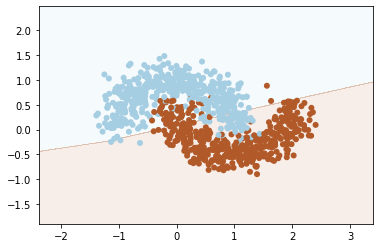

In [90]:
Xmin1, Xmax1 = X_train[:,0].min()-1, X_train[:,0].max()+1
Xmin2, Xmax2 = X_train[:,1].min()-1, X_train[:,1].max()+1
x1_span = np.linspace(Xmin1,Xmax1,1000)
x2_span = np.linspace(Xmin2,Xmax2,1000)
xx, yy = np.meshgrid(x1_span,x2_span)

labels = model_2.predict_classes(np.c_[xx.ravel(),yy.ravel()])
z = labels.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx,yy,z,cmap='Paired',alpha=0.1)

ax.scatter(X_train[:,0],X_train[:,1],c=Y_train, cmap='Paired',lw=0)